# Ancillary external photometry

This tutorial shows how to use external photometric data to perform astrometry calibrations on a Cube

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import numpy as np

from pykoala.data_container import Cube
from pykoala.instruments.koala_ifu import koala_rss

rss = koala_rss("data/27feb20035red.fits")
rss.intensity = rss.intensity / rss.info["exptime"]

[pykoala] 2024/10/10 08:53|INFO> 
> Reading KOALA RSS file 27feb20035red.fits
[pykoala] 2024/10/10 08:53|INFO> No. of fibres in this RSS =1000
No. of good fibres = 986
No. of bad fibres = 14
[pykoala] 2024/10/10 08:53|INFO> Bad fibres = [109, 110, 235, 424, 574, 607, 675, 714, 721, 722, 723, 793, 950, 951]


  'Angstroms' -> 'Angstrom'. [astropy.wcs.wcs]


In [3]:
from pykoala.corrections.flux_calibration import FluxCalibration

fcal = FluxCalibration.from_text_file('products/response_HILT600_transfer_function.dat')

rss = fcal.apply(rss)

[pykoala.correction.FluxCalibration] 2024/10/10 08:53|INFO> Initialising Flux Calibration (Spectral Throughput)
[pykoala.correction.FluxCalibration] 2024/10/10 08:53|INFO> Interpolating spectral response to input wavelength array
[pykoala.correction.FluxCalibration] 2024/10/10 08:53|INFO> Updating response and wavelength arrays


/home/pcorchoc/Develop/koala/src/pykoala/corrections/flux_calibration.py:680: RuntimeWarning: divide by zero encountered in divide
  spectra_container_out.rss_intensity = (spectra_container_out.rss_intensity


/home/pcorchoc/Develop/koala/src/pykoala/data_container.py:460: RuntimeWarning: invalid value encountered in sqrt
  return self.intensity / self.variance**0.5
/home/pcorchoc/Develop/koala/src/pykoala/data_container.py:460: RuntimeWarning: invalid value encountered in divide
  return self.intensity / self.variance**0.5


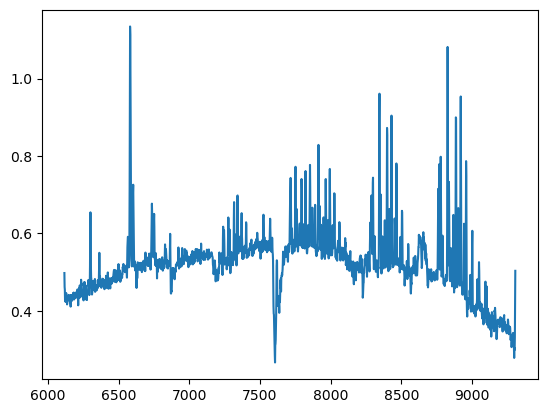

In [4]:
plt.figure()
plt.plot(rss.wavelength, rss.snr[500])

In [5]:
from pykoala.photometry import query_image, PSQuery

# Query r-band photometry from PS using a cutout with the size of the input cube
# + 30 additional arcseconds on every side. Save the fits in the current working directory
# image_query_results = query_image([cube], filters='i', im_extra_size_arcsec=30, im_output_dir='.')

image_query_results = {"PS1.i": {}}
image_query_results["PS1.i"]["ccd"] = PSQuery.read_ps_fits("ps_query_129.0629_n26.4126_i.fits")
image_query_results["PS1.i"]["pix_size"] = PSQuery.pixelsize_arcsec

[pykoala] 2024/10/10 08:53|INFO> Opening PANSTARRS fits file


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


/home/pcorchoc/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


[pykoala] 2024/10/10 08:53|INFO> Using RSS fibre synthetic photometry as apertures
[pykoala] 2024/10/10 08:53|INFO> Computing astrometric offsets
[pykoala] 2024/10/10 08:53|INFO> Cross-correlating image to list of apertures
[pykoala] 2024/10/10 08:53|INFO> Input number of apertures: 493
[pykoala] 2024/10/10 08:53|INFO> Number of input apertures used: 493
[0. 0.]
[-2.36067977  0.        ]
[2.36067977 0.        ]
[5.27864045 0.        ]
[3.13856912 0.        ]
[3.3431498 0.       ]
[3.10658494 0.        ]
[3.23257486 0.        ]
[3.17447612 0.        ]
[3.15228438 0.        ]
[3.12635225 0.        ]
[3.13834912 0.        ]
[3.14093505 0.        ]
[3.13866213 0.        ]
[3.13861563 0.        ]
[3.13859786 0.        ]
[3.13858689 0.        ]
[3.1385801 0.       ]
[3.13857591 0.        ]
[3.13857332 0.        ]
[3.13857171 0.        ]
[3.13857073 0.        ]
[3.13857011 0.        ]
[3.13856974 0.        ]
[3.1385695 0.       ]
[3.13856936 0.        ]
[3.13856927 0.        ]
[3.13856921 0. 

/home/pcorchoc/Develop/koala/src/pykoala/photometry.py:829: RuntimeWarning: invalid value encountered in log10
  im_sb = -2.5 * np.log10(


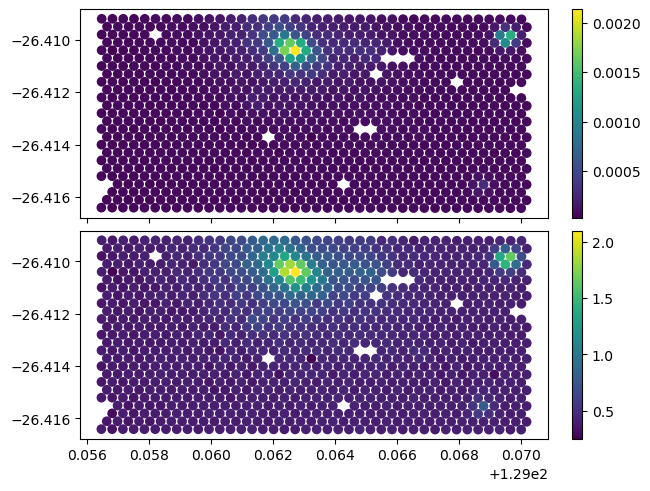

In [7]:
from pykoala.corrections.astrometry import AstrometryOffsetCorrection

astrometric_correction, results = AstrometryOffsetCorrection.from_external_image(
    rss, image_query_results["PS1.i"], filter_name="PANSTARRS_PS1.i")



/home/pcorchoc/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


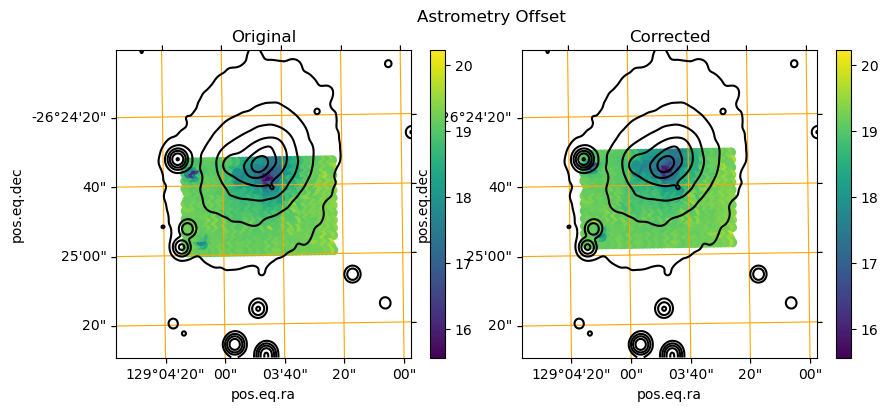

In [8]:
results["offset_fig"]

In [9]:
#cube = astrometric_correction.apply(cube)
# Save the final version of the cube
#cube.to_fits("products/Henize_2-10_cube_astrometry.fits.gz")